In [7]:
import matplotlib.pyplot as plt


from src.config_parameters import SelectionConfig, CrossoverConfig, MutationConfig, GeneticConfig
from src.tsp_genetic_enums import SelectionMethod, CrossoverMethod, MutationMethod
from src.tsp_solver import TSPSolver

In [8]:
def run_test(mutation_rate, crossover_rate, population_size, random_seed=None, selection_pressure=None):

    selection_config = SelectionConfig(
        selection_method=SelectionMethod.TOURNAMENT,  # Use enum for selection method
        tournament_size=3,
        selection_pressure=selection_pressure,  # Optional, if needed
        random_seed=42  # Optional, for reproducibility
    )

    # Create crossover configuration
    crossover_config = CrossoverConfig(
        crossover_method=CrossoverMethod.SINGLE_POINT,
        crossover_rate=crossover_rate
    )

    # Create mutation configuration
    mutation_config = MutationConfig(
        mutation_rate=mutation_rate,
        mutation_method=MutationMethod.INVERSION  # Use enum for mutation method
    )

    # Now, create the complete genetic algorithm configuration
    config = GeneticConfig(
        generations=200,
        population_size=population_size,
        selection_config=selection_config,
        crossover_config=crossover_config,
        mutation_config=mutation_config
    )

    # distance_file = "15.in"

    solver = TSPSolver(distance_file="15.in", config={"folder": "../input"})

    best_distances, best_route = solver.solve(config)

    return best_distances, best_route, solver.best_distance

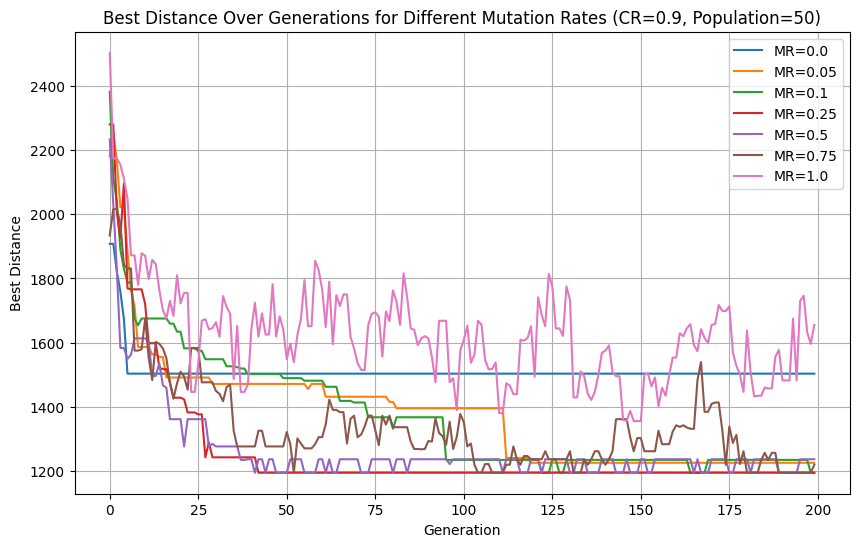

Mutation Rate: 0.0
Best route: [np.str_('city_11'), np.str_('city_12'), np.str_('city_13'), np.str_('city_14'), np.str_('city_15'), np.str_('city_5'), np.str_('city_8'), np.str_('city_7'), np.str_('city_6'), np.str_('city_3'), np.str_('city_4'), np.str_('city_1'), np.str_('city_2'), np.str_('city_9'), np.str_('city_10')]
Shortest distance: 1503.0
--------------------------------------------------
Mutation Rate: 0.05
Best route: [np.str_('city_4'), np.str_('city_5'), np.str_('city_9'), np.str_('city_6'), np.str_('city_7'), np.str_('city_8'), np.str_('city_10'), np.str_('city_11'), np.str_('city_12'), np.str_('city_13'), np.str_('city_14'), np.str_('city_15'), np.str_('city_2'), np.str_('city_1'), np.str_('city_3')]
Shortest distance: 1225.0
--------------------------------------------------
Mutation Rate: 0.1
Best route: [np.str_('city_12'), np.str_('city_13'), np.str_('city_14'), np.str_('city_15'), np.str_('city_2'), np.str_('city_1'), np.str_('city_3'), np.str_('city_4'), np.str_('ci

In [9]:
crossover_rate = 0.9
population_size = 50


mutation_rates = [0.00, 0.05, 0.1, 0.25, 0.5, 0.75, 1.0]


results = []


for mr in mutation_rates:
    best_distances, best_route, best_distance = run_test(
        mr, crossover_rate, population_size
    )
    results.append((mr, best_distances, best_route, best_distance))


plt.figure(figsize=(10, 6))


for mr, best_distances, best_route, best_distance in results:
    plt.plot(best_distances, label=f"MR={mr}")


plt.title(
    f"Best Distance Over Generations for Different Mutation Rates (CR={crossover_rate}, Population={population_size})"
)
plt.xlabel("Generation")
plt.ylabel("Best Distance")
plt.legend()
plt.grid(True)
plt.savefig("../output/mutation_rates_2.png")
plt.show()


for mr, best_distances, best_route, best_distance in results:
    print(f"Mutation Rate: {mr}")
    print(f"Best route: {best_route}")
    print(f"Shortest distance: {best_distance}")
    print("-" * 50)



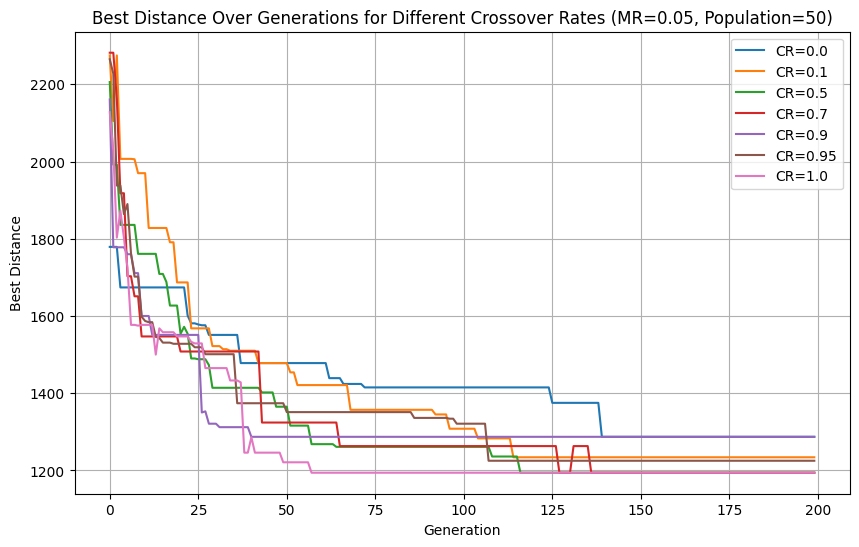

Crossover Rate: 0.0
Best route: [np.str_('city_7'), np.str_('city_6'), np.str_('city_4'), np.str_('city_3'), np.str_('city_1'), np.str_('city_2'), np.str_('city_5'), np.str_('city_15'), np.str_('city_14'), np.str_('city_13'), np.str_('city_12'), np.str_('city_11'), np.str_('city_10'), np.str_('city_9'), np.str_('city_8')]
Shortest distance: 1287.0
--------------------------------------------------
Crossover Rate: 0.1
Best route: [np.str_('city_6'), np.str_('city_5'), np.str_('city_4'), np.str_('city_3'), np.str_('city_1'), np.str_('city_2'), np.str_('city_15'), np.str_('city_14'), np.str_('city_13'), np.str_('city_12'), np.str_('city_10'), np.str_('city_11'), np.str_('city_9'), np.str_('city_8'), np.str_('city_7')]
Shortest distance: 1234.0
--------------------------------------------------
Crossover Rate: 0.5
Best route: [np.str_('city_5'), np.str_('city_6'), np.str_('city_7'), np.str_('city_8'), np.str_('city_9'), np.str_('city_10'), np.str_('city_11'), np.str_('city_12'), np.str_('c

In [10]:
mutation_rate = 0.05
population_size = 50


crossover_rates = [0.0, 0.1, 0.5, 0.7, 0.9, 0.95, 1.0]


results = []


for cr in crossover_rates:
    best_distances, best_route, best_distance = run_test(
        mutation_rate, cr, population_size
    )
    results.append((cr, best_distances, best_route, best_distance))

plt.figure(figsize=(10, 6))

for cr, best_distances, best_route, best_distance in results:
    plt.plot(best_distances, label=f"CR={cr}")

plt.title(
    f"Best Distance Over Generations for Different Crossover Rates (MR={mutation_rate}, Population={population_size})"
)
plt.xlabel("Generation")
plt.ylabel("Best Distance")
plt.legend()
plt.grid(True)
plt.show()

for cr, best_distances, best_route, best_distance in results:
    print(f"Crossover Rate: {cr}")
    print(f"Best route: {best_route}")
    print(f"Shortest distance: {best_distance}")
    print("-" * 50)

In [11]:
crossover_rates = [0.7, 0.8, 0.9, 1.0]
mutation_rates_dict = {
    0.7: [0.00, 0.1, 0.25, 0.5, 0.8],
    0.8: [0.00, 0.1, 0.25, 0.5, 0.8],
    0.9: [0.00, 0.1, 0.25, 0.5, 0.8],
    1.0: [0.00, 0.1, 0.25, 0.5, 0.8],
}

population_size = 50
results = []


for cr in crossover_rates:
    for mr in mutation_rates_dict[cr]:
        best_distances, best_route, best_distance = run_test(mr, cr, population_size)
        results.append((cr, mr, best_distances, best_route, best_distance))

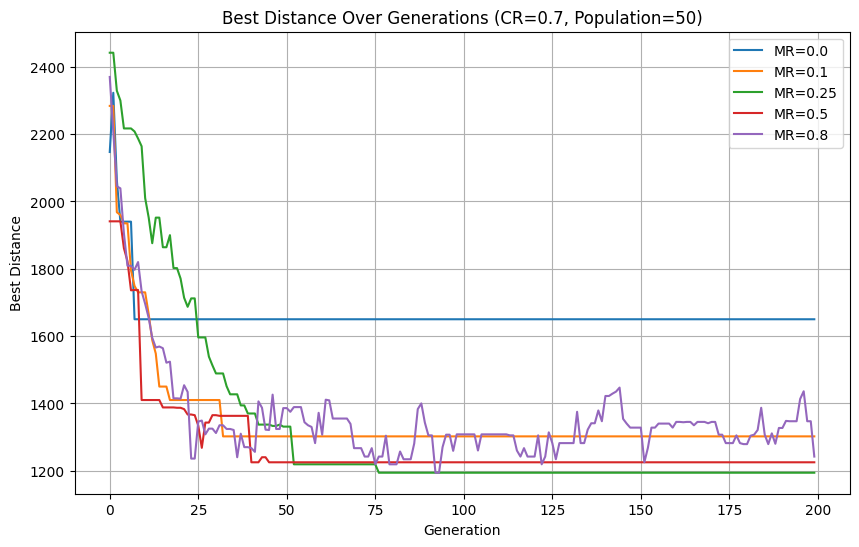

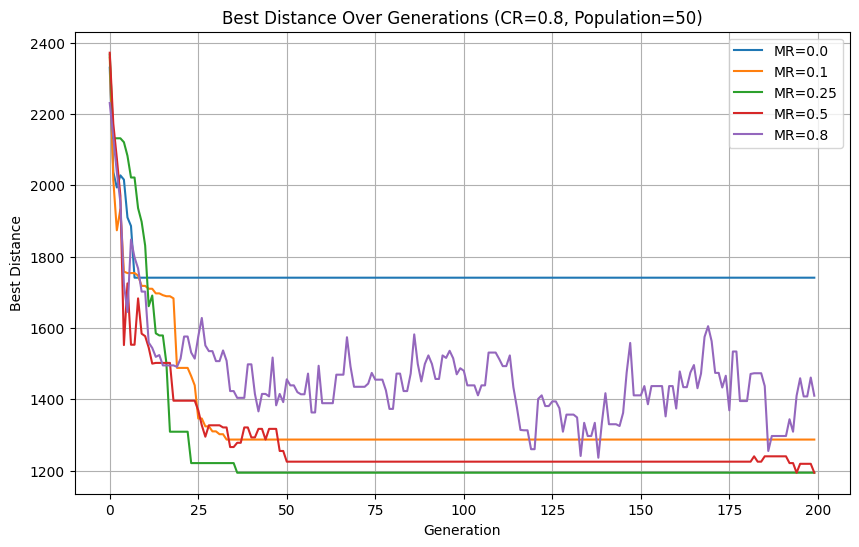

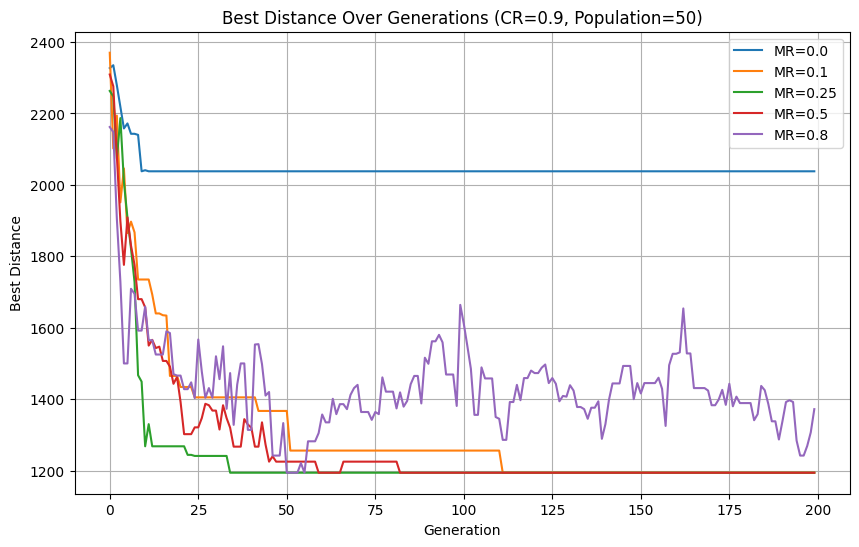

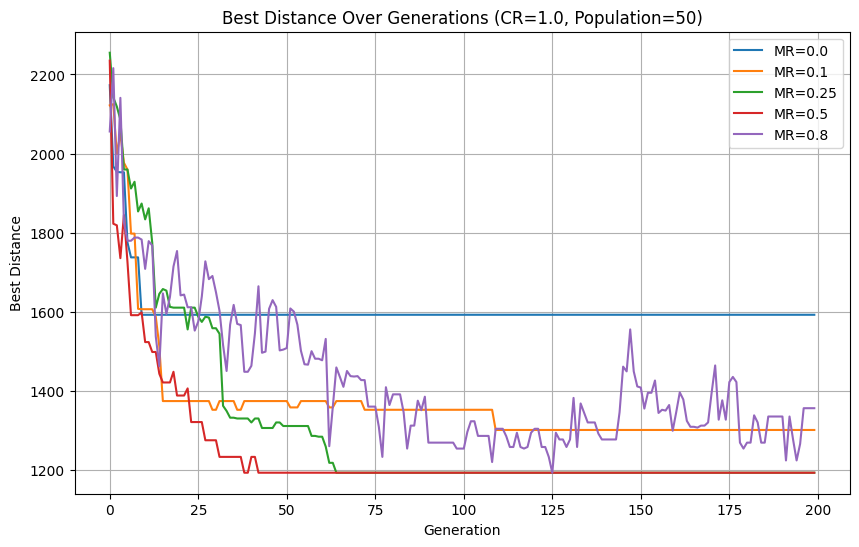

In [12]:
for cr in crossover_rates:
    plt.figure(figsize=(10, 6))

    filtered_results = [res for res in results if res[0] == cr]

    for cr_val, mr, best_distances, best_route, best_distance in filtered_results:
        plt.plot(best_distances, label=f"MR={mr}")

    plt.title(f"Best Distance Over Generations (CR={cr}, Population={population_size})")
    plt.xlabel("Generation")
    plt.ylabel("Best Distance")
    plt.legend()
    plt.grid(True)

    plt.show()